# CLASSIFICATION TASK WITH TENSORFLOW and 

#  DEALING WITH OVERFITTING

# EARLY STOPPING

# dropout layers

In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

In [2]:
df = pd.read_csv('C:/Users/tyagi/Desktop/cancer_classification.csv')

In [3]:
df.head()

,mean radius,mean texture,mean perimeter,mean area,mean smoothness,mean compactness,mean concavity,mean concave points,mean symmetry,mean fractal dimension,...,worst texture,worst perimeter,worst area,worst smoothness,worst compactness,worst concavity,worst concave points,worst symmetry,worst fractal dimension,benign_0__mal_1
0,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.3001,0.14710,0.2419,0.07871,...,17.33,184.60,2019.0,0.1622,0.6656,0.7119,0.2654,0.4601,0.11890,0
1,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.0869,0.07017,0.1812,0.05667,...,23.41,158.80,1956.0,0.1238,0.1866,0.2416,0.1860,0.2750,0.08902,0
2,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.1974,0.12790,0.2069,0.05999,...,25.53,152.50,1709.0,0.1444,0.4245,0.4504,0.2430,0.3613,0.08758,0
3,11.42,20.38,77.58,386.1,0.14250,0.28390,0.2414,0.10520,0.2597,0.09744,...,26.50,98.87,567.7,0.2098,0.8663,0.6869,0.2575,0.6638,0.17300,0
4,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.1980,0.10430,0.1809,0.05883,...,16.67,152.20,1575.0,0.1374,0.2050,0.4000,0.1625,0.2364,0.07678,0


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 569 entries, 0 to 568
Data columns (total 31 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   mean radius              569 non-null    float64
 1   mean texture             569 non-null    float64
 2   mean perimeter           569 non-null    float64
 3   mean area                569 non-null    float64
 4   mean smoothness          569 non-null    float64
 5   mean compactness         569 non-null    float64
 6   mean concavity           569 non-null    float64
 7   mean concave points      569 non-null    float64
 8   mean symmetry            569 non-null    float64
 9   mean fractal dimension   569 non-null    float64
 10  radius error             569 non-null    float64
 11  texture error            569 non-null    float64
 12  perimeter error          569 non-null    float64
 13  area error               569 non-null    float64
 14  smoothness error         5

In [5]:
df.isnull().sum()

mean radius                0
mean texture               0
mean perimeter             0
mean area                  0
mean smoothness            0
mean compactness           0
mean concavity             0
mean concave points        0
mean symmetry              0
mean fractal dimension     0
radius error               0
texture error              0
perimeter error            0
area error                 0
smoothness error           0
compactness error          0
concavity error            0
concave points error       0
symmetry error             0
fractal dimension error    0
worst radius               0
worst texture              0
worst perimeter            0
worst area                 0
worst smoothness           0
worst compactness          0
worst concavity            0
worst concave points       0
worst symmetry             0
worst fractal dimension    0
benign_0__mal_1            0
dtype: int64

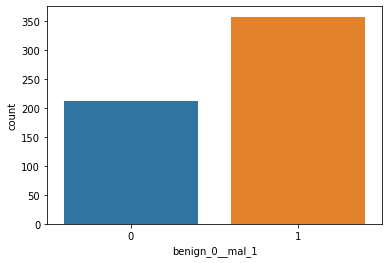

In [6]:
# for classification task use countplot

sns.countplot(df['benign_0__mal_1'])

In [7]:
df.corr()['benign_0__mal_1'] # Least corr. = mean concave points,  highly corr = smoothness error

mean radius               -0.730029
mean texture              -0.415185
mean perimeter            -0.742636
mean area                 -0.708984
mean smoothness           -0.358560
mean compactness          -0.596534
mean concavity            -0.696360
mean concave points       -0.776614
mean symmetry             -0.330499
mean fractal dimension     0.012838
radius error              -0.567134
texture error              0.008303
perimeter error           -0.556141
area error                -0.548236
smoothness error           0.067016
compactness error         -0.292999
concavity error           -0.253730
concave points error      -0.408042
symmetry error             0.006522
fractal dimension error   -0.077972
worst radius              -0.776454
worst texture             -0.456903
worst perimeter           -0.782914
worst area                -0.733825
worst smoothness          -0.421465
worst compactness         -0.590998
worst concavity           -0.659610
worst concave points      -0

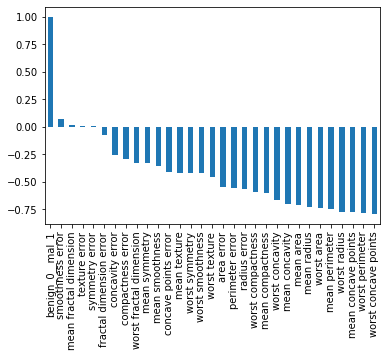

In [8]:
df.corr()['benign_0__mal_1'].sort_values(ascending=False).plot(kind='bar')

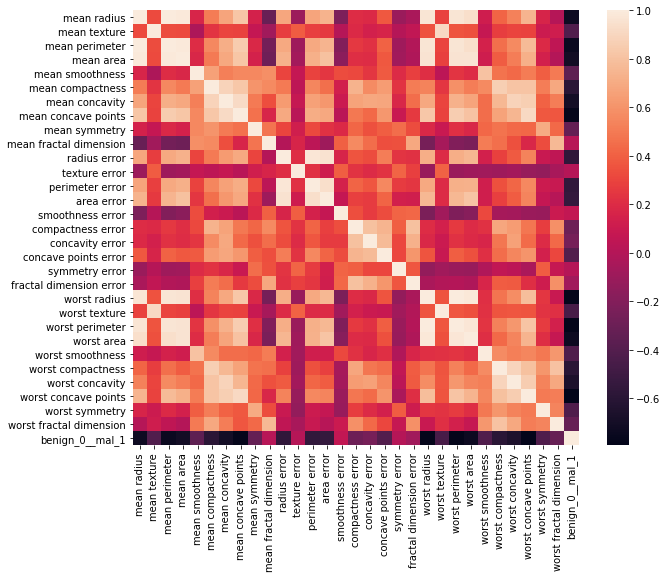

In [9]:
plt.figure(figsize=(10,8))
sns.heatmap(df.corr())

In [10]:
import sklearn

In [11]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import MinMaxScaler,StandardScaler

In [12]:
import tensorflow

In [13]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense

# tensorflow 

## .values

In [14]:
X = df.drop('benign_0__mal_1',axis=1).values
y = df['benign_0__mal_1'].values

# when using tensorflow , always use .values while splitting data.  IMPORTANT.

X_train, X_test, y_train, y_test = train_test_split( X, y, test_size=0.25, random_state=101)

In [15]:
scaler = MinMaxScaler()

In [16]:
X_train = scaler.fit_transform(X_train)

In [17]:
X_test = scaler.transform(X_test)

In [18]:
X_train.shape

(426, 30)

In [19]:
model = Sequential()

model.add(Dense(30,activation='relu'))
model.add(Dense(15,activation='relu'))

# BINARY CLASSIFICATION PROBLEM 

model.add(Dense(1,activation='sigmoid'))


model.compile(optimizer='adam',loss='binary_crossentropy')


In [20]:
model.fit(X_train,y_train,epochs=600,validation_data=(X_test,y_test))

Train on 426 samples, validate on 143 samples
Epoch 1/600
426/426 [==============================] - 0s 1ms/sample - loss: 0.6748 - val_loss: 0.6564
Epoch 2/600
426/426 [==============================] - 0s 57us/sample - loss: 0.6467 - val_loss: 0.6293
Epoch 3/600
426/426 [==============================] - 0s 61us/sample - loss: 0.6153 - val_loss: 0.5937
Epoch 4/600
426/426 [==============================] - 0s 59us/sample - loss: 0.5730 - val_loss: 0.5449
Epoch 5/600
426/426 [==============================] - 0s 63us/sample - loss: 0.5245 - val_loss: 0.4946
Epoch 6/600
426/426 [==============================] - 0s 56us/sample - loss: 0.4741 - val_loss: 0.4454
Epoch 7/600
426/426 [==============================] - 0s 68us/sample - loss: 0.4261 - val_loss: 0.3964
Epoch 8/600
426/426 [==============================] - 0s 84us/sample - loss: 0.3811 - val_loss: 0.3527
Epoch 9/600
426/426 [==============================] - 0s 70us/sample - loss: 0.3443 - val_loss: 0.3168
Epoch 10/600
426/42

426/426 [==============================] - 0s 59us/sample - loss: 0.0392 - val_loss: 0.1558
Epoch 156/600
426/426 [==============================] - 0s 67us/sample - loss: 0.0401 - val_loss: 0.1444
Epoch 157/600
426/426 [==============================] - 0s 66us/sample - loss: 0.0396 - val_loss: 0.1680
Epoch 158/600
426/426 [==============================] - 0s 61us/sample - loss: 0.0394 - val_loss: 0.1491
Epoch 159/600
426/426 [==============================] - 0s 60us/sample - loss: 0.0381 - val_loss: 0.1646
Epoch 160/600
426/426 [==============================] - 0s 71us/sample - loss: 0.0384 - val_loss: 0.1485
Epoch 161/600
426/426 [==============================] - 0s 62us/sample - loss: 0.0386 - val_loss: 0.1530
Epoch 162/600
426/426 [==============================] - 0s 61us/sample - loss: 0.0372 - val_loss: 0.1632
Epoch 163/600
426/426 [==============================] - 0s 65us/sample - loss: 0.0404 - val_loss: 0.1510
Epoch 164/600
426/426 [==============================] - 0s 

426/426 [==============================] - 0s 71us/sample - loss: 0.0295 - val_loss: 0.1831
Epoch 233/600
426/426 [==============================] - 0s 68us/sample - loss: 0.0310 - val_loss: 0.1821
Epoch 234/600
426/426 [==============================] - 0s 89us/sample - loss: 0.0356 - val_loss: 0.1798
Epoch 235/600
426/426 [==============================] - 0s 82us/sample - loss: 0.0316 - val_loss: 0.1788
Epoch 236/600
426/426 [==============================] - 0s 73us/sample - loss: 0.0295 - val_loss: 0.1793
Epoch 237/600
426/426 [==============================] - 0s 68us/sample - loss: 0.0311 - val_loss: 0.1943
Epoch 238/600
426/426 [==============================] - 0s 71us/sample - loss: 0.0295 - val_loss: 0.1746
Epoch 239/600
426/426 [==============================] - 0s 68us/sample - loss: 0.0281 - val_loss: 0.1851
Epoch 240/600
426/426 [==============================] - 0s 63us/sample - loss: 0.0284 - val_loss: 0.1909
Epoch 241/600
426/426 [==============================] - 0s 

426/426 [==============================] - 0s 61us/sample - loss: 0.0149 - val_loss: 0.2281
Epoch 387/600
426/426 [==============================] - 0s 64us/sample - loss: 0.0152 - val_loss: 0.2582
Epoch 388/600
426/426 [==============================] - 0s 63us/sample - loss: 0.0143 - val_loss: 0.2276
Epoch 389/600
426/426 [==============================] - 0s 58us/sample - loss: 0.0150 - val_loss: 0.2284
Epoch 390/600
426/426 [==============================] - 0s 65us/sample - loss: 0.0138 - val_loss: 0.2453
Epoch 391/600
426/426 [==============================] - 0s 58us/sample - loss: 0.0137 - val_loss: 0.2315
Epoch 392/600
426/426 [==============================] - 0s 63us/sample - loss: 0.0131 - val_loss: 0.2414
Epoch 393/600
426/426 [==============================] - 0s 61us/sample - loss: 0.0132 - val_loss: 0.2334
Epoch 394/600
426/426 [==============================] - 0s 61us/sample - loss: 0.0155 - val_loss: 0.2402
Epoch 395/600
426/426 [==============================] - 0s 

426/426 [==============================] - 0s 66us/sample - loss: 0.0057 - val_loss: 0.3182
Epoch 541/600
426/426 [==============================] - 0s 66us/sample - loss: 0.0072 - val_loss: 0.3343
Epoch 542/600
426/426 [==============================] - 0s 65us/sample - loss: 0.0068 - val_loss: 0.3058
Epoch 543/600
426/426 [==============================] - 0s 91us/sample - loss: 0.0068 - val_loss: 0.3451
Epoch 544/600
426/426 [==============================] - 0s 82us/sample - loss: 0.0062 - val_loss: 0.3069
Epoch 545/600
426/426 [==============================] - 0s 71us/sample - loss: 0.0059 - val_loss: 0.3278
Epoch 546/600
426/426 [==============================] - 0s 66us/sample - loss: 0.0057 - val_loss: 0.3236
Epoch 547/600
426/426 [==============================] - 0s 63us/sample - loss: 0.0059 - val_loss: 0.3233
Epoch 548/600
426/426 [==============================] - 0s 67us/sample - loss: 0.0054 - val_loss: 0.3155
Epoch 549/600
426/426 [==============================] - 0s 

In [21]:
losses = pd.DataFrame(model.history.history)

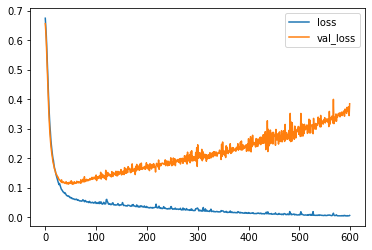

In [22]:
losses.plot()   # overfitting data  : this means that we are training for too many epochs.

## now we will use early stopping to stop training data in case of overfitting

In [23]:
model = Sequential()

model.add(Dense(30,activation='relu'))
model.add(Dense(15,activation='relu'))

# BINARY CLASSIFICATION PROBLEM 

model.add(Dense(1,activation='sigmoid'))


model.compile(optimizer='adam',loss='binary_crossentropy')

# CALLBACKS  - EARLY STOPPIG

In [24]:
from tensorflow.keras.callbacks import Callback,EarlyStopping

In [25]:
# step 1 : create object

early_stop = EarlyStopping(monitor='val_loss',mode='min',verbose=1,patience=25)

# mode : min, max , auto : depending on what we are monitoring.

# patience : we will wait for 25 epochs even after that stopping point is detected.

In [26]:
# step 2 : insert this object while training data.
model.fit(X_train,y_train,validation_data=(X_test,y_test),epochs=600,callbacks = [early_stop])

Train on 426 samples, validate on 143 samples
Epoch 1/600
426/426 [==============================] - 1s 2ms/sample - loss: 0.6896 - val_loss: 0.6796
Epoch 2/600
426/426 [==============================] - 0s 63us/sample - loss: 0.6609 - val_loss: 0.6467
Epoch 3/600
426/426 [==============================] - 0s 61us/sample - loss: 0.6270 - val_loss: 0.6114
Epoch 4/600
426/426 [==============================] - 0s 68us/sample - loss: 0.5927 - val_loss: 0.5679
Epoch 5/600
426/426 [==============================] - 0s 68us/sample - loss: 0.5438 - val_loss: 0.5166
Epoch 6/600
426/426 [==============================] - 0s 63us/sample - loss: 0.4937 - val_loss: 0.4597
Epoch 7/600
426/426 [==============================] - 0s 63us/sample - loss: 0.4396 - val_loss: 0.4095
Epoch 8/600
426/426 [==============================] - 0s 68us/sample - loss: 0.3914 - val_loss: 0.3573
Epoch 9/600
426/426 [==============================] - 0s 67us/sample - loss: 0.3478 - val_loss: 0.3147
Epoch 10/600
426/42

In [27]:
model_loss = pd.DataFrame(model.history.history)

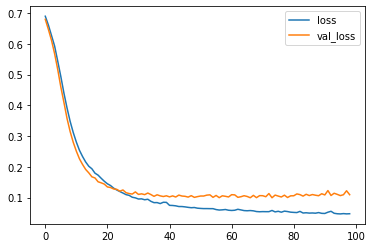

In [28]:
model_loss.plot()   # reduced overfitting

# dropout layers : turn down certain percentage of neurons.

In [29]:
from tensorflow.keras.layers import Dropout

In [30]:
model = Sequential()

model.add(Dense(30,activation='relu'))
model.add(Dropout(rate=0.5))    # 0 means 0%, 1 means 100%.

model.add(Dense(15,activation='relu'))
model.add(Dropout(rate=0.5))

# BINARY CLASSIFICATION PROBLEM 

model.add(Dense(1,activation='sigmoid'))


model.compile(optimizer='adam',loss='binary_crossentropy')

In [31]:
model.fit(X_train,y_train,validation_data=(X_test,y_test),epochs=600,callbacks = [early_stop])

Train on 426 samples, validate on 143 samples
Epoch 1/600
426/426 [==============================] - 1s 1ms/sample - loss: 0.7032 - val_loss: 0.6705
Epoch 2/600
426/426 [==============================] - 0s 96us/sample - loss: 0.6838 - val_loss: 0.6511
Epoch 3/600
426/426 [==============================] - 0s 73us/sample - loss: 0.6565 - val_loss: 0.6345
Epoch 4/600
426/426 [==============================] - 0s 66us/sample - loss: 0.6642 - val_loss: 0.6215
Epoch 5/600
426/426 [==============================] - 0s 70us/sample - loss: 0.6339 - val_loss: 0.6047
Epoch 6/600
426/426 [==============================] - 0s 68us/sample - loss: 0.6075 - val_loss: 0.5836
Epoch 7/600
426/426 [==============================] - 0s 70us/sample - loss: 0.6008 - val_loss: 0.5550
Epoch 8/600
426/426 [==============================] - 0s 66us/sample - loss: 0.5821 - val_loss: 0.5267
Epoch 9/600
426/426 [==============================] - 0s 68us/sample - loss: 0.5611 - val_loss: 0.4960
Epoch 10/600
426/42

426/426 [==============================] - 0s 90us/sample - loss: 0.0729 - val_loss: 0.0844
Epoch 156/600
426/426 [==============================] - 0s 105us/sample - loss: 0.0728 - val_loss: 0.0787
Epoch 157/600
426/426 [==============================] - 0s 98us/sample - loss: 0.0663 - val_loss: 0.0777
Epoch 158/600
426/426 [==============================] - 0s 84us/sample - loss: 0.0730 - val_loss: 0.0696
Epoch 159/600
426/426 [==============================] - 0s 82us/sample - loss: 0.0699 - val_loss: 0.0900
Epoch 160/600
426/426 [==============================] - 0s 80us/sample - loss: 0.0754 - val_loss: 0.0928
Epoch 161/600
426/426 [==============================] - 0s 80us/sample - loss: 0.0719 - val_loss: 0.0713
Epoch 162/600
426/426 [==============================] - 0s 94us/sample - loss: 0.0802 - val_loss: 0.0788
Epoch 163/600
426/426 [==============================] - 0s 90us/sample - loss: 0.0793 - val_loss: 0.0746
Epoch 164/600
426/426 [==============================] - 0s

In [32]:
model_loss2 = pd.DataFrame(model.history.history)

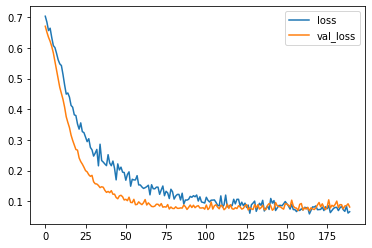

In [33]:
model_loss2.plot()   # fantastic behaviour

# evaluation

In [34]:
pred_class= model.predict_classes(X_test)

In [35]:
from sklearn.metrics import confusion_matrix,classification_report   # to evaluate classification problems

In [36]:
confusion_matrix(y_test,pred_class)

array([[54,  1],
       [ 2, 86]], dtype=int64)

In [37]:
print(classification_report(y_test,pred_class))

              precision    recall  f1-score   support

           0       0.96      0.98      0.97        55
           1       0.99      0.98      0.98        88

    accuracy                           0.98       143
   macro avg       0.98      0.98      0.98       143
weighted avg       0.98      0.98      0.98       143

